# Avalição Qualidade do Vinho

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

### Collecting Data

In [2]:
df_train = pd.read_csv("./datasets/vinhos/winequality-red.csv", sep=";")
df_test = pd.read_csv("./datasets/vinhos/winequality-white.csv", sep=";")


### Data Information

In [3]:
df_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df_train.groupby(['quality']).mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


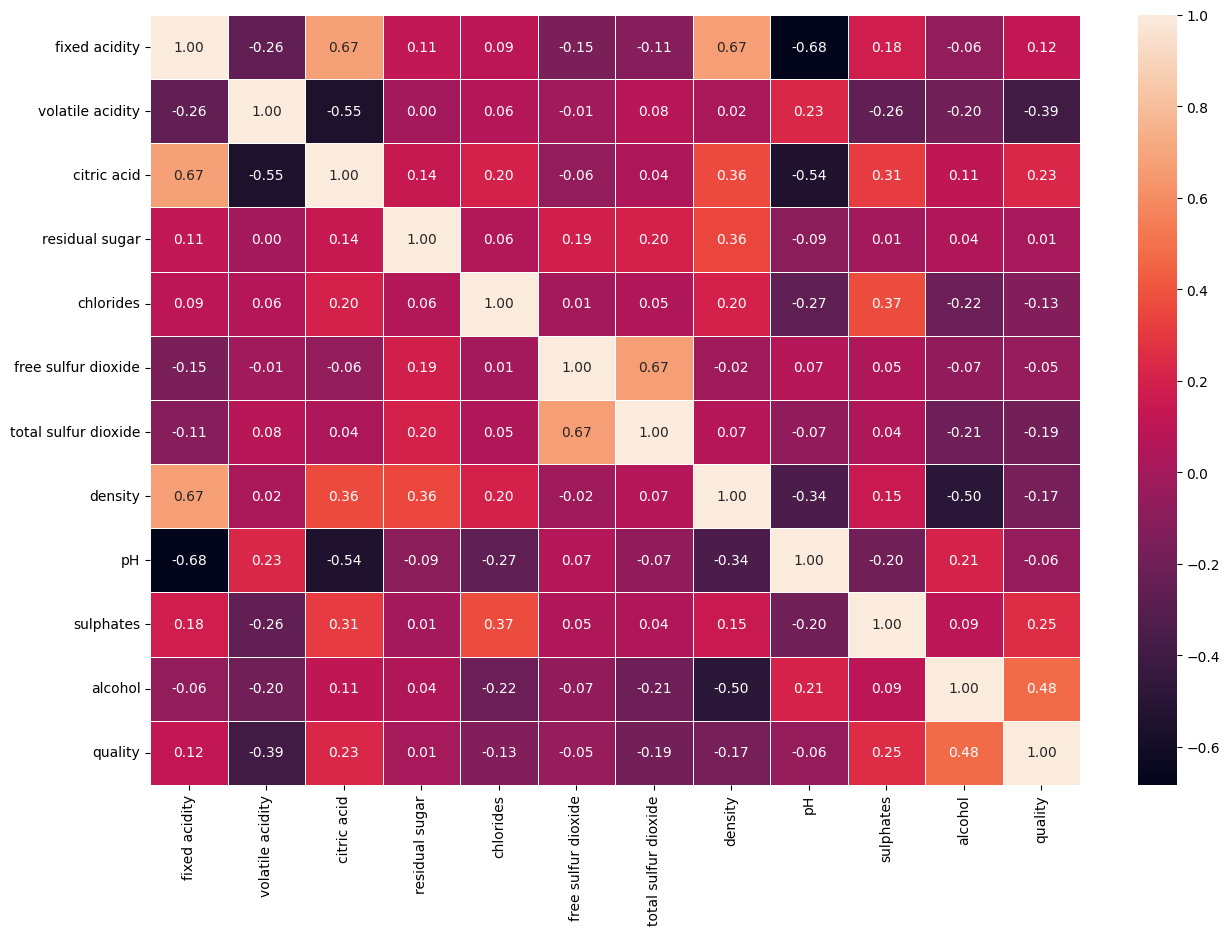

In [6]:
correlation = df_train.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation, annot=True, fmt='.2f', linewidth=0.5)
plt.show()

### Plots and Visualization

In [7]:
var_model = ['volatile acidity', 'citric acid','chlorides','sulphates', 'alcohol']
X = df_train[var_model]
target = df_train['quality']

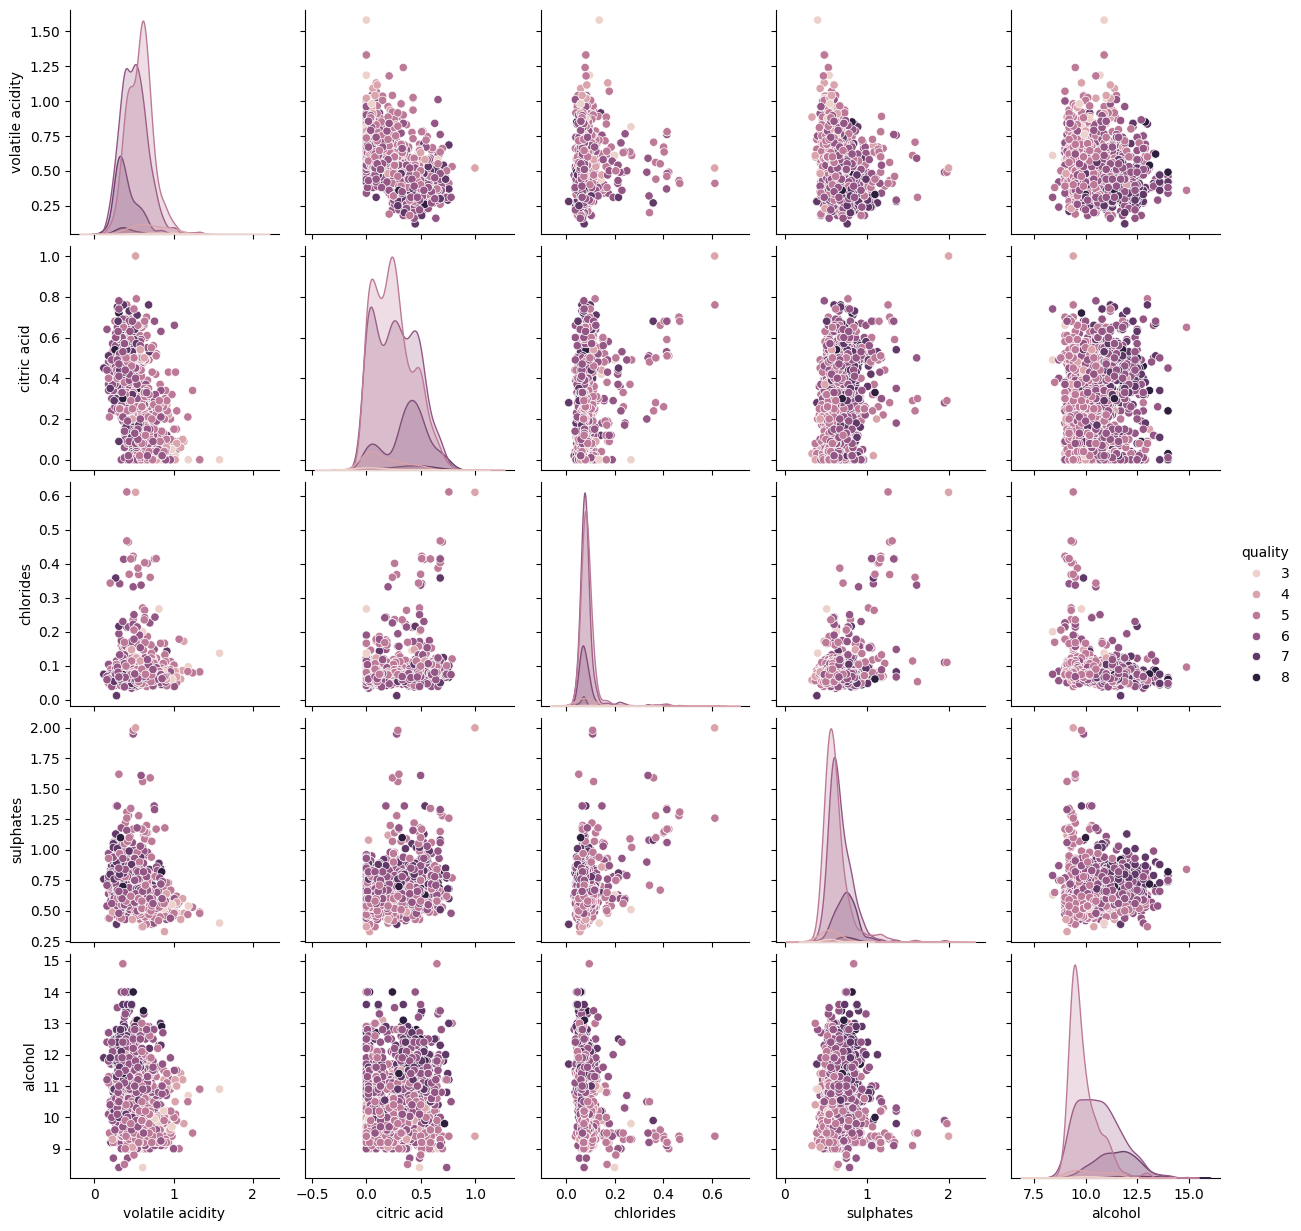

In [8]:
ax = sns.pairplot(df_train[['volatile acidity', 'citric acid','chlorides','sulphates', 'alcohol','quality']], hue='quality')

In [9]:
arvore = tree.DecisionTreeClassifier(max_depth=4)
arvore.fit(X, target)

DecisionTreeClassifier(max_depth=4)

In [11]:
class_names = list(map(str, arvore.classes_))

[Text(0.5, 0.9, 'alcohol <= 10.25\ngini = 0.643\nsamples = 1599\nvalue = [10.0, 53.0, 681.0, 638.0, 199.0, 18.0]\nclass = 5'),
 Text(0.25, 0.7, 'sulphates <= 0.575\ngini = 0.523\nsamples = 842\nvalue = [7.0, 29.0, 519.0, 260.0, 25.0, 2.0]\nclass = 5'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'alcohol <= 9.75\ngini = 0.411\nsamples = 353\nvalue = [4, 19, 262, 66, 2, 0]\nclass = 5'),
 Text(0.0625, 0.3, 'alcohol <= 9.075\ngini = 0.352\nsamples = 244\nvalue = [2, 14, 193, 34, 1, 0]\nclass = 5'),
 Text(0.03125, 0.1, 'gini = 0.698\nsamples = 13\nvalue = [1, 3, 4, 5, 0, 0]\nclass = 6'),
 Text(0.09375, 0.1, 'gini = 0.313\nsamples = 231\nvalue = [1, 11, 189, 29, 1, 0]\nclass = 5'),
 Text(0.1875, 0.3, 'volatile acidity <= 0.587\ngini = 0.511\nsamples = 109\nvalue = [2, 5, 69, 32, 1, 0]\nclass = 5'),
 Text(0.15625, 0.1, 'gini = 0.544\nsamples = 39\nvalue = [0, 2, 17, 20, 0, 0]\nclass = 6'),
 Text(0.21875, 0.1, 'gini = 0.416\nsamples = 70\nvalue = [2, 3, 52, 12, 1, 0]\nclass = 5'),
 Text(0.

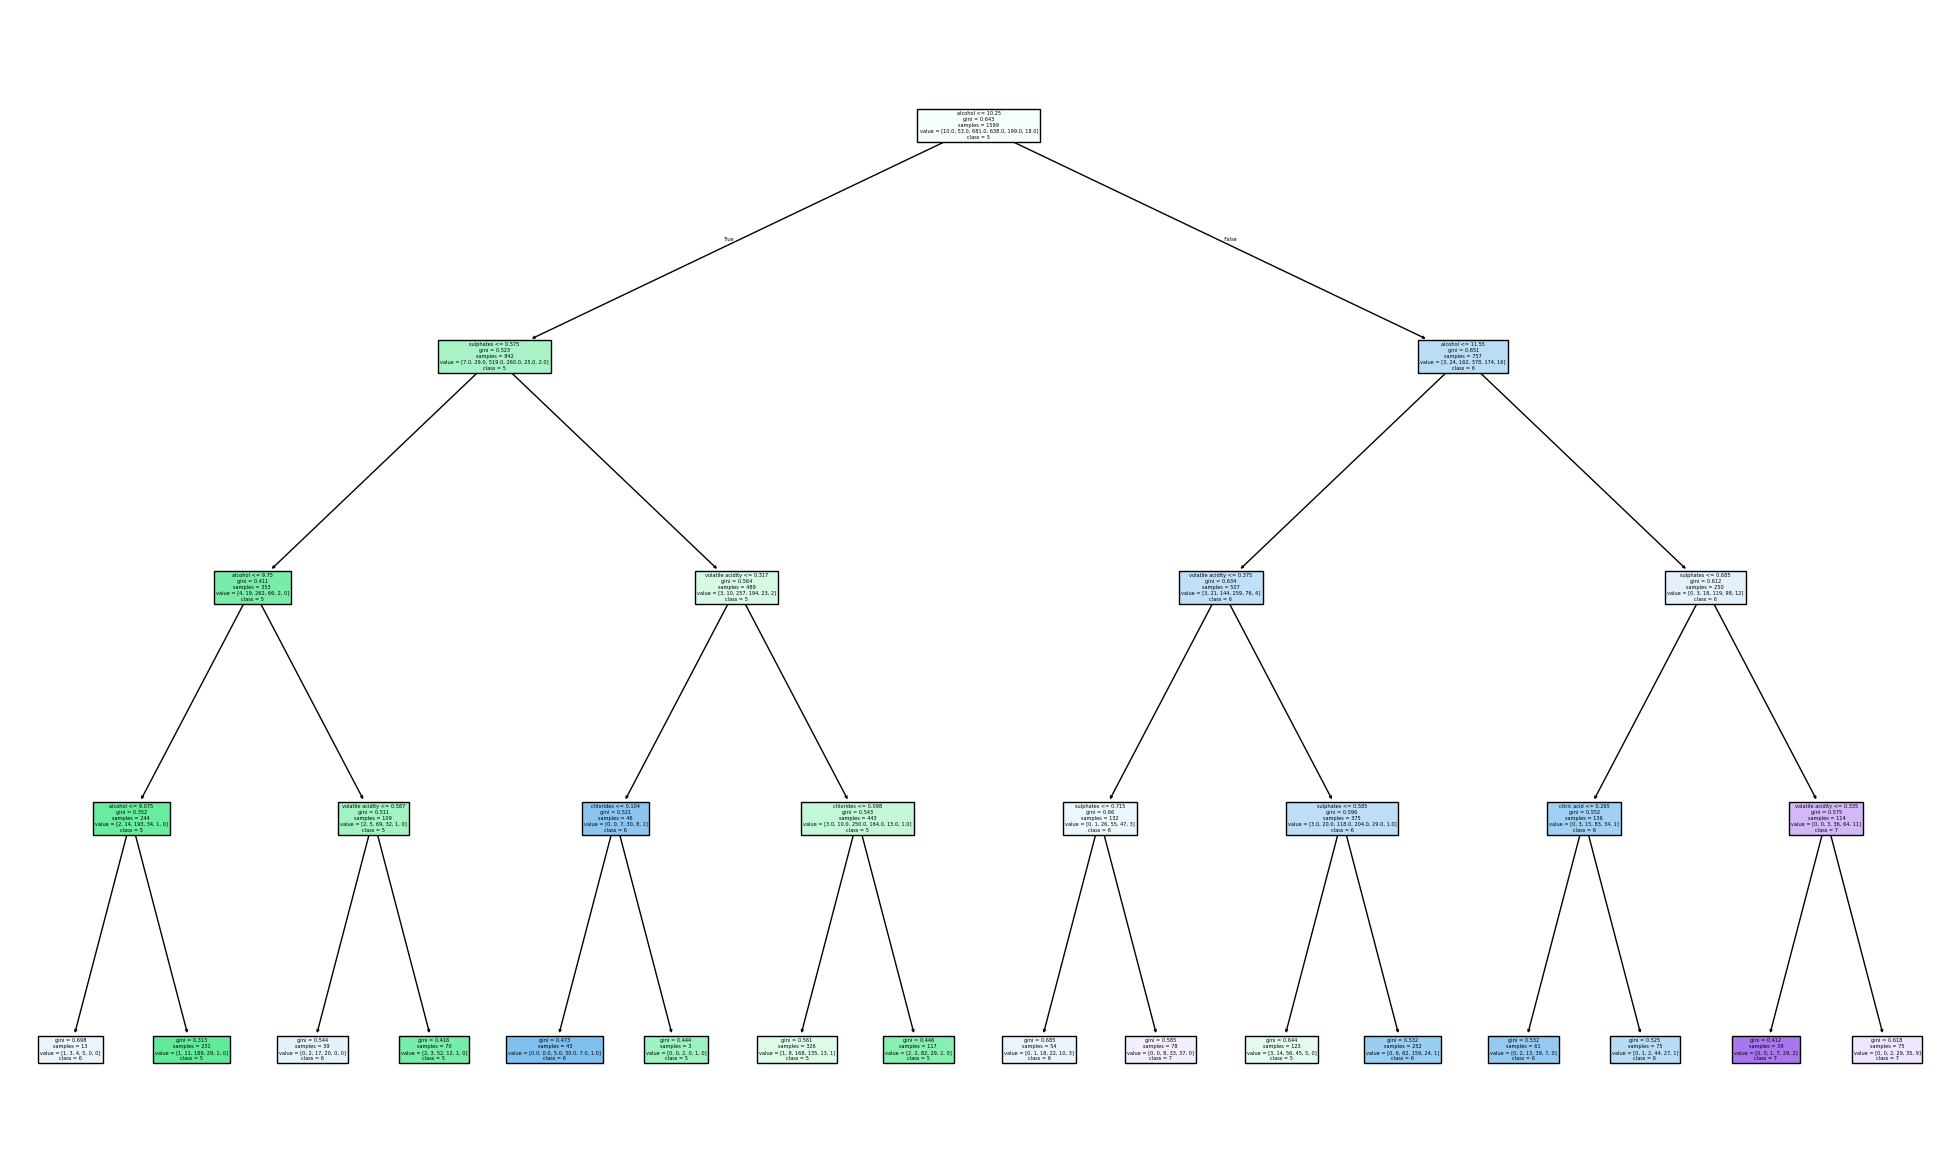

In [12]:
plt.figure(figsize=(25, 15))
tree.plot_tree(arvore, 
               class_names=class_names, 
               feature_names=X.columns, 
               filled=True
               )

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=42)

In [14]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [15]:
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")

Acurácia: 0.56


In [16]:

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Relatório de Classificação:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.62      0.75      0.68       195
           6       0.51      0.55      0.53       200
           7       0.39      0.21      0.28        61
           8       0.00      0.00      0.00         6

    accuracy                           0.56       480
   macro avg       0.25      0.25      0.25       480
weighted avg       0.52      0.56      0.53       480



c:\Users\Marcelo Saldanha\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Marcelo Saldanha\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Marcelo Saldanha\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
